In [57]:
import numpy as np
from fermi_sim import *
from scipy import sparse
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

In [20]:
#Hamiltonian of SSH model, with two coupling strength t1 and t2
def Hamiltonian_SSH(N, t1, t2):
    
    assert N%2 == 0
    
    H1 = sparse.csr_matrix((2**N, 2**N), dtype=float)
    for i in range (int(N/2)):
        H1 +=  create_op(N, 2**(2*i)).dot(annihil_op(N, 2**(2*i+1)))
        H1 +=  create_op(N, 2**(2*i+1)).dot(annihil_op(N, 2**(2*i)))
        
    H2 = sparse.csr_matrix((2**N, 2**N), dtype=float)
    for i in range (int(N/2)-1):
        i = i + 1
        H2 +=  create_op(N, 2**(2*i)).dot(annihil_op(N, 2**(2*i-1)))
        H2 +=  create_op(N, 2**(2*i-1)).dot(annihil_op(N, 2**(2*i)))
        
    H = t1 * H1 + t2 * H2
    
    return H

In [31]:
H_SSH = Hamiltonian_SSH(10, 0, 1)
print(np.shape(H_SSH))
print(type(H_SSH))

(1024, 1024)
<class 'scipy.sparse.csr.csr_matrix'>


In [72]:
num_op1 = number_op(10, 1)
print(np.shape(num_op))

(1024, 1024)


In [35]:
E, v = np.linalg.eigh(H_SSH.toarray())

In [46]:
#pick an eigenstate which has a high occupation at the edge.
np.vdot(v[:,1], num_op1.dot(v[:,1]))

0.9999246760481721

In [61]:
#quench:
H_quench = Hamiltonian_SSH(10, 0.2, 1)

In [88]:
def quench(H, v, dτ, nsteps, numeroprator):
    
    v /= np.linalg.norm(v)
    
    num_traj = np.zeros(nsteps)
    num_traj[0] = np.vdot(v,  numeroprator.dot(v)).real
    for n in range(1, nsteps):
        v = spla.expm_multiply(-(1j)*(dτ)*H, v)
        #v /= np.linalg.norm(v)
        num_traj[n] = np.vdot((v),  numeroprator.dot(v)).real
        
    plt.plot(dτ*np.arange(nsteps), num_traj)
    #plt.plot(dτ*np.arange(nsteps), num_traj1)
    plt.show()
        

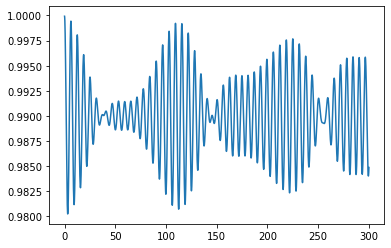

In [203]:
quench(Hamiltonian_SSH(10, 0.1, 1), v[:,1], 0.1, 3001, num_op1)
#we can see that the edge state is protected.

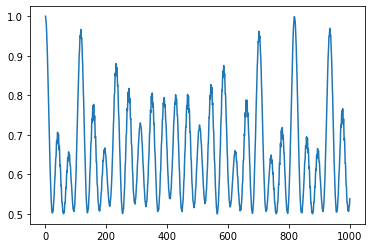

In [181]:
#bulk
num_op5 = number_op(10, 2**4)
quench(Hamiltonian_SSH(10, 0.1, 1), create_op(10,2**4).dot(v[:,1]), 0.1, 10001, num_op5)
#but the bulk state is not protected, the occupation decays fast.

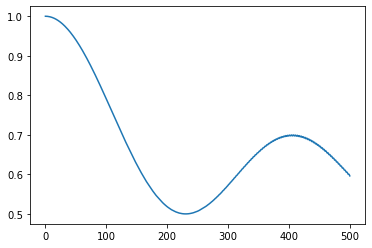

In [186]:
#the decay rate is related to the coupling strength:
quench(Hamiltonian_SSH(10, 0.01, 1), create_op(10,2**4).dot(v[:,1]), 0.5, 1001, num_op5)

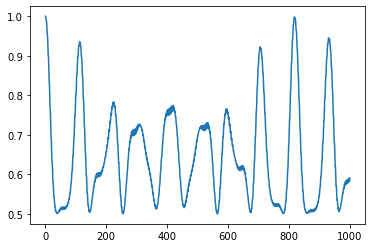

In [196]:
quench(Hamiltonian_SSH(10, 0.1, 1), create_op(10,2).dot(v[:,1]), 0.1, 10001, num_op2)

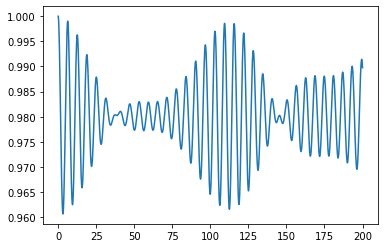

In [214]:
#use single excitation to see whether the topological properties can be detected.
#edge:
v_single = np.zeros(2**10)
v_single[1] = 1 
quench(Hamiltonian_SSH(10, 0.1, 1), v_single, 0.1, 2001,number_op(10, 1))

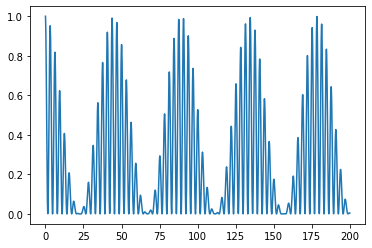

In [212]:
#bulk. 
#Also, increase the length of chain to see the oscillation frequency.
#the oscillation frequency decrease with length.
v_single = np.zeros(2**8)
v_single[2**4] = 1 
quench(Hamiltonian_SSH(8, 0.1, 1), v_single, 0.1, 2001, number_op(8, 2**4))

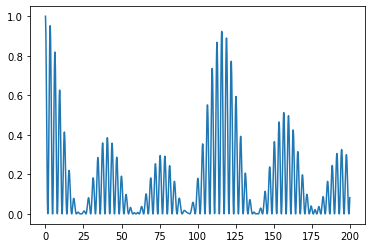

In [216]:
v_single = np.zeros(2**10)
v_single[2**5] = 1 
quench(Hamiltonian_SSH(10, 0.1, 1), v_single, 0.1, 2001, number_op(10, 2**5))

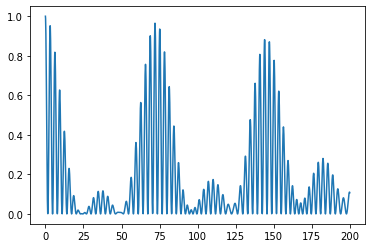

In [217]:
v_single = np.zeros(2**12)
v_single[2**6] = 1 
quench(Hamiltonian_SSH(12, 0.1, 1), v_single, 0.1, 2001, number_op(12, 2**6))

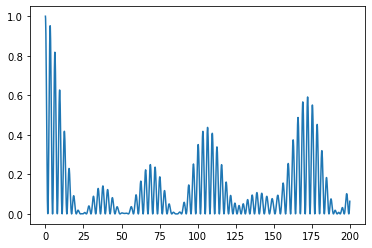

In [218]:
v_single = np.zeros(2**14)
v_single[2**7] = 1 
quench(Hamiltonian_SSH(14, 0.1, 1), v_single, 0.1, 2001, number_op(14, 2**7))

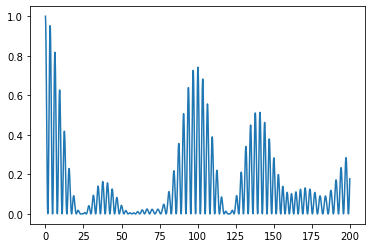

In [219]:
v_single = np.zeros(2**16)
v_single[2**8] = 1 
quench(Hamiltonian_SSH(16, 0.1, 1), v_single, 0.1, 2001, number_op(16, 2**8))

In [ ]:
#larger system size, slower the oscillation.